In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./data/weather3.csv")

df.head()

df = df[["AQI"]]

In [13]:
data = np.array(df)
data

array([[80],
       [88],
       [94],
       ...,
       [71],
       [71],
       [72]])

In [14]:
def difference(data):
    return [k[1] - k[0] for k in zip(data, data[1:])]

In [15]:
def sequence(data, prev):

    iterable = [data[i:] for i in range(prev + 1)]

    a = [k[:-1] for k in zip(*iterable)]
    b = [k[-1] for k in zip(*iterable)]


    a = np.array(a)
    b = np.array(b)

    b = b.reshape(-1, 1)

    return a, b

In [16]:
d = difference(data)

In [22]:
x, y = sequence(d, 6)

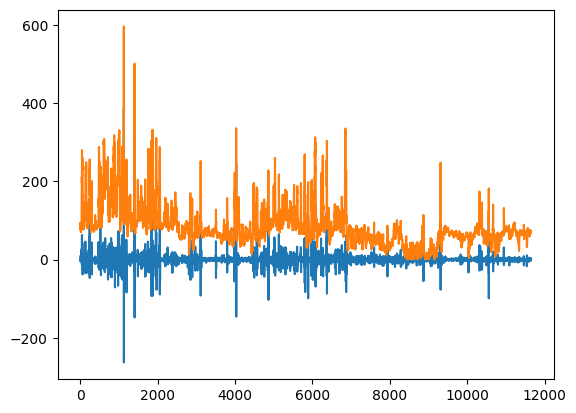

In [25]:
xs = np.arange(0, len(d) + 1, 1)

plt.plot(xs[1:], d)
plt.plot(xs, data)

In [26]:
x[:5]

array([[[ 8],
        [ 6],
        [-3],
        [-4],
        [-1],
        [-2]],

       [[ 6],
        [-3],
        [-4],
        [-1],
        [-2],
        [-2]],

       [[-3],
        [-4],
        [-1],
        [-2],
        [-2],
        [-2]],

       [[-4],
        [-1],
        [-2],
        [-2],
        [-2],
        [-1]],

       [[-1],
        [-2],
        [-2],
        [-2],
        [-1],
        [-1]]])

In [27]:
y[:5]

array([[-2],
       [-2],
       [-1],
       [-1],
       [-1]])

In [28]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

2024-08-02 04:45:19.658266: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-02 04:45:19.659867: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-02 04:45:19.690851: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-02 04:45:19.691673: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-02 04:45:20.327040: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [29]:
model = Sequential()

model.add(Dense(64, input_dim=x.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [30]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [31]:
train_size = round(0.95 * len(x))
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [32]:
x_train.shape

(11063, 6, 1)

In [33]:
y_train.shape

(11063, 1)

In [34]:
history = model.fit(x_train, y_train, validation_split=0.08, epochs = 100)


Epoch 1/100
319/319 [==============================] - 1s 1ms/step - loss: 143.0853 - mae: 4.6715 - val_loss: 53.5132 - val_mae: 2.8298
Epoch 2/100
319/319 [==============================] - 0s 1ms/step - loss: 140.3462 - mae: 4.6584 - val_loss: 49.4456 - val_mae: 2.7887
Epoch 3/100
319/319 [==============================] - 0s 956us/step - loss: 135.7204 - mae: 4.6142 - val_loss: 51.1543 - val_mae: 2.8259
Epoch 4/100
319/319 [==============================] - 0s 932us/step - loss: 135.0788 - mae: 4.5934 - val_loss: 48.1236 - val_mae: 2.7870
Epoch 5/100
319/319 [==============================] - 0s 954us/step - loss: 135.5903 - mae: 4.6365 - val_loss: 49.4260 - val_mae: 2.7726
Epoch 6/100
319/319 [==============================] - 0s 958us/step - loss: 130.9672 - mae: 4.5403 - val_loss: 49.3308 - val_mae: 2.7397
Epoch 7/100
319/319 [==============================] - 0s 937us/step - loss: 133.0313 - mae: 4.5792 - val_loss: 50.2195 - val_mae: 2.7551
Epoch 8/100
319/319 [=================

In [36]:
import matplotlib.pyplot as plt

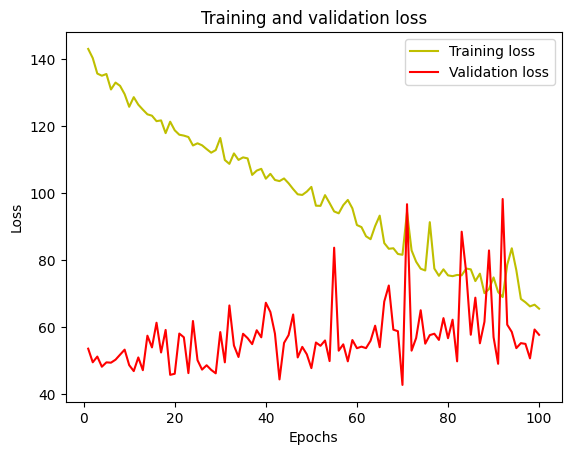

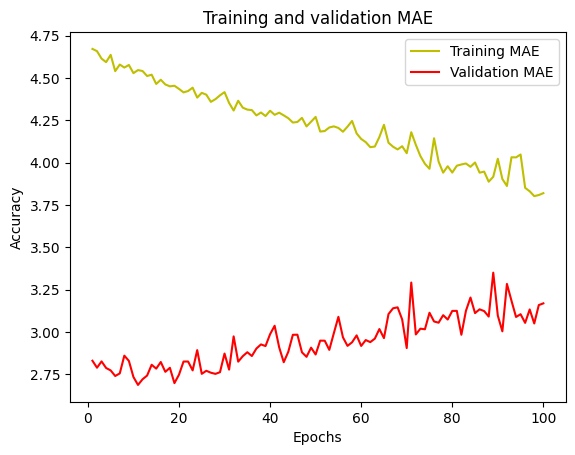

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
y_pred = model.predict(x_test)

19/19 [==============================] - 0s 781us/step


In [39]:
xs = np.arange(0, len(y_pred), 1)

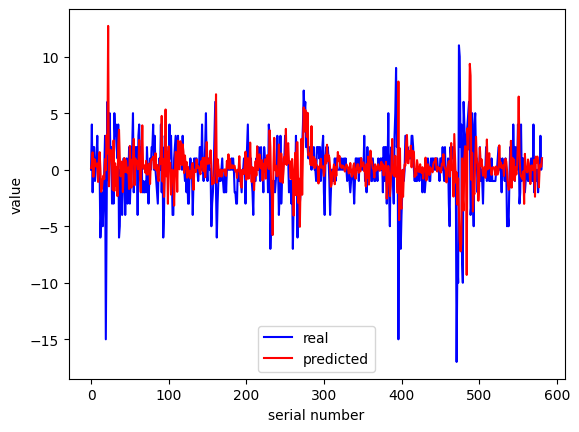

In [40]:
plt.plot(xs, y_test, color = 'blue', label = 'real')
plt.plot(xs, y_pred, color = 'red', label = 'predicted')
plt.xlabel('serial number')
plt.ylabel('value')

plt.legend()

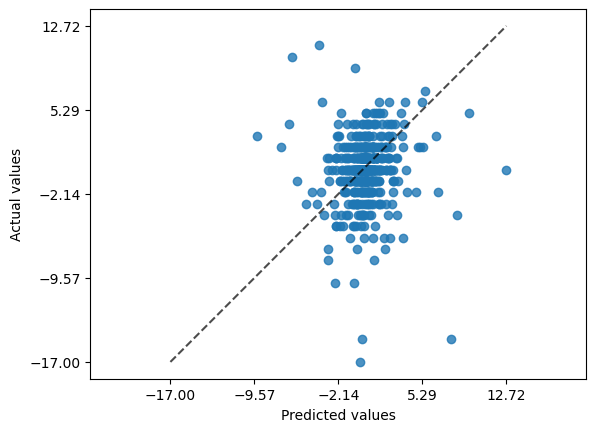

R2 Score: -0.3624589443206787
Mean Absolute Error: 2.010738843597497
Mean Squared Error: 9.733711625084402
Mean Absolute Percentage Error: 961620458802483.0
Mean Absolute Error: 1.326627105474472
Explained Varaince Score: -0.352580173588275


In [41]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score

import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay


display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot(kind="actual_vs_predicted")
plt.show()

print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {median_absolute_error(y_test, y_pred)}")
print(f"Explained Varaince Score: {explained_variance_score(y_test, y_pred)}")